# Reto predicción de valor de viviendas en Santorini


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nkanak/predicting-prices-of-airbnb-listings/refs/heads/main/santorini_listings.csv")
data.head()

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,availability_90,availability_365.1,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,13131,Green Windmill,50838,Nikos,36.45281,25.43206,Entire home/apt,413,2,7,...,24,180,5.00,5.00,5.00,5.00,5.00,4.71,5.00,f
1,13443,Lilac Windmill Villa,50838,Nikos,36.45264,25.43225,Entire home/apt,413,2,10,...,22,157,5.00,5.00,5.00,5.00,5.00,4.60,4.80,f
2,48289,cavehouse with caldera sunsetview,219945,Ioanna,36.46203,25.37248,Entire home/apt,179,2,186,...,20,165,4.84,4.80,4.91,4.93,4.91,4.95,4.77,t
3,79679,Oia -Studio caldera view from bedroom,429493,Anastasia,36.46078,25.37603,Entire home/apt,98,6,76,...,66,109,4.93,4.97,4.85,4.99,4.97,4.99,4.82,t
4,80447,Kelenis Apartments Santorini,434714,Kelenis Apartments,36.41035,25.44408,Entire home/apt,57,3,128,...,56,261,4.51,4.57,4.62,4.73,4.81,4.42,4.57,t


In [3]:
data.shape

(4540, 54)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4540 non-null   int64  
 1   name                            4540 non-null   object 
 2   host_id                         4540 non-null   int64  
 3   host_name                       4537 non-null   object 
 4   latitude                        4540 non-null   float64
 5   longitude                       4540 non-null   float64
 6   room_type                       4540 non-null   object 
 7   price                           4540 non-null   int64  
 8   minimum_nights                  4540 non-null   int64  
 9   number_of_reviews               4540 non-null   int64  
 10  last_review                     3352 non-null   object 
 11  reviews_per_month               3352 non-null   float64
 12  calculated_host_listings_count  45

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,availability_60,availability_90,availability_365.1,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,4.540000e+03,4.540000e+03,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,3352.000000,4540.000000,4540.000000,...,4540.000000,4540.000000,4540.000000,3352.000000,3333.000000,3333.000000,3332.000000,3333.000000,3332.000000,3332.000000
mean,2.955505e+07,1.535167e+08,36.408083,25.430520,357.598678,1.661674,27.475330,1.590594,20.820044,185.751542,...,30.977093,42.177093,185.751542,4.787983,4.797387,4.845170,4.863001,4.852910,4.732191,4.698857
std,1.555851e+07,1.334688e+08,0.038471,0.031906,712.327489,1.298764,48.262524,2.094417,51.783843,121.555208,...,18.451580,29.012512,121.555208,0.377487,0.355952,0.306507,0.322010,0.337528,0.360013,0.364820
min,1.313100e+04,5.083800e+04,36.333650,25.335220,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.693918e+07,2.590185e+07,36.375645,25.408307,99.000000,1.000000,0.000000,0.390000,3.000000,61.000000,...,17.000000,18.000000,61.000000,4.730000,4.750000,4.810000,4.860000,4.840000,4.610000,4.620000
50%,3.271322e+07,1.332267e+08,36.412745,25.432965,180.000000,1.000000,7.000000,1.000000,6.000000,186.000000,...,31.000000,37.000000,186.000000,4.890000,4.900000,4.940000,4.960000,4.960000,4.830000,4.770000
75%,4.344804e+07,2.539672e+08,36.434510,25.450620,363.000000,2.000000,33.000000,2.000000,11.000000,296.000000,...,47.000000,68.000000,296.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000
max,5.232111e+07,4.213704e+08,36.481210,25.486700,20968.000000,39.000000,861.000000,27.000000,268.000000,365.000000,...,60.000000,90.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## **Análisis exploratorio de Datos**

En esta sección, se haran diversos análisis para entender de una mejor manera los datos que viven en el conjunto. Distribución de los precios, caracterpisitcas, distancias y más relaciones.

### Analisis de completitud de datos.

Procesamiento para determinar la cantidad de nulos en el dataSet

In [12]:
def plot_missing(df):

    # Calculamos el porcentaje de valores faltantes por columna
    missing_percent = df.isnull().mean()*100
        
    # Filtramos las columnas con valores faltantes
    missing_percent = missing_percent[missing_percent>0].sort_values(ascending = False)

    if missing_percent.empty:
        print("No hay valores nulos en el DataFrame")
        return
    
    # Generamos la gráfica
    plt.figure(figsize=(10,6))
    missing_percent.plot(kind = 'bar', color = 'skyblue', edgecolor='black')
    plt.title('Porcentaje valores faltantes por columna', fontsize = 14)
    plt.xlabel('Columnas', fontsize = 14)
    plt.ylabel('Porcentae valores faltantes (%)', fontsize = 14)
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()
    plt.show()

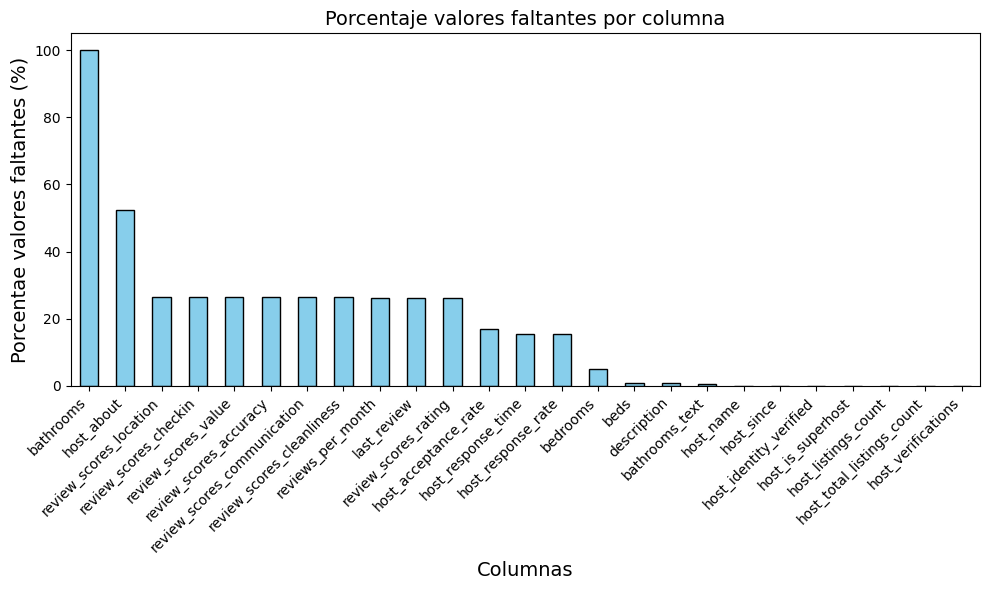

In [13]:
plot_missing(data)